#1. 미니 배치와 배치 크기(Mini Batch and Batch Size)

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

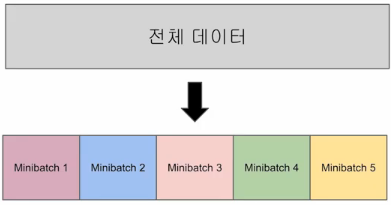

데이터가 수십만개 이상이라면 전체 데이터에 대해서 경사 하강법을 수행하는 것은 매우 느릴 뿐만 아니라 많은 계산량이 필요하다  
그렇기 때문에 전체 데이터를 더 작은 단위로 나누어서 해당 단위로 학습하는 개념이 나오게 되었는데 이 단위를 미니 배치라고 한다.

- 전체 데이터에 대해서 한 번에 경사 하강법을 수행하는 방법을 '배치 경사 하강법'이라고 부릅니다. 반면, 미니 배치 단위로 경사 하강법을 수행하는 방법을 '미니 배치 경사 하강법'이라고 부릅니다.

- 배치 경사 하강법은 경사 하강법을 할 때, 전체 데이터를 사용하므로 가중치 값이 최적값에 수렴하는 과정이 매우 안정적이지만, 계산량이 너무 많이 듭니다. 미니 배치 경사 하강법은 경사 하강법을 할 때, 전체 데이터의 일부만을 보고 수행하므로 최적값으로 수렴하는 과정에서 값이 조금 헤매기도 하지만 훈련 속도가 빠릅니다.

- 배치 크기는 보통 2의 제곱수를 사용합니다. ex) 2, 4, 8, 16, 32, 64... 그 이유는 CPU와 GPU의 메모리가 2의 배수이므로 배치크기가 2의 제곱수일 경우에 데이터 송수신의 효율을 높일 수 있다고 합니다.

#2. 이터레이션(Iteration)

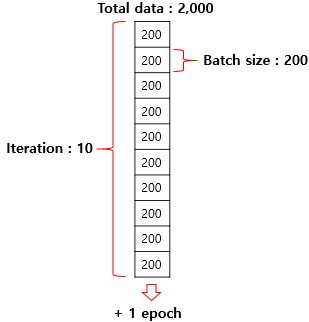

위 그림은 에포크와 배치 크기와 이터레이션의 관계  

#3. 데이터 로드하기(Data Load)

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [15]:
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

In [16]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [17]:
dataset = TensorDataset(x_train, y_train)

In [18]:
dataloader = DataLoader(dataset, batch_size = 2, shuffle = True)

In [19]:
model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr =1e-5)

In [20]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
    # print(batch_idx)
    # print(samples)
    x_train, y_train = samples
    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

Epoch    0/20 Batch 1/3 Cost: 44992.132812
Epoch    0/20 Batch 2/3 Cost: 10029.987305
Epoch    0/20 Batch 3/3 Cost: 2528.610840
Epoch    1/20 Batch 1/3 Cost: 1595.097656
Epoch    1/20 Batch 2/3 Cost: 342.879974
Epoch    1/20 Batch 3/3 Cost: 124.069328
Epoch    2/20 Batch 1/3 Cost: 84.846519
Epoch    2/20 Batch 2/3 Cost: 32.325981
Epoch    2/20 Batch 3/3 Cost: 9.839005
Epoch    3/20 Batch 1/3 Cost: 1.032183
Epoch    3/20 Batch 2/3 Cost: 26.500280
Epoch    3/20 Batch 3/3 Cost: 28.442924
Epoch    4/20 Batch 1/3 Cost: 19.347597
Epoch    4/20 Batch 2/3 Cost: 26.331751
Epoch    4/20 Batch 3/3 Cost: 11.416595
Epoch    5/20 Batch 1/3 Cost: 9.447386
Epoch    5/20 Batch 2/3 Cost: 14.640342
Epoch    5/20 Batch 3/3 Cost: 28.524687
Epoch    6/20 Batch 1/3 Cost: 23.604280
Epoch    6/20 Batch 2/3 Cost: 15.455585
Epoch    6/20 Batch 3/3 Cost: 12.684993
Epoch    7/20 Batch 1/3 Cost: 24.590754
Epoch    7/20 Batch 2/3 Cost: 8.742309
Epoch    7/20 Batch 3/3 Cost: 9.351729
Epoch    8/20 Batch 1/3 Cost: 2.0

In [21]:
new_var = torch.FloatTensor([[73,80,75]])
pred_y = model(new_var)
print('입력에 대한 결과 : ',pred_y)

입력에 대한 결과 :  tensor([[157.3112]], grad_fn=<AddmmBackward0>)
